In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [2]:
ibm = pd.read_csv('IBM Attrition Data.csv')

In [3]:
ibm.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
ibm.shape

(1470, 13)

In [5]:
ibm.Age.value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [6]:
ibm.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
Attrition_binary = []

In [8]:
for val in range(0,len(ibm)):
    if ibm.Attrition[val] == 'Yes':
        Attrition_binary.append(1)
    else:Attrition_binary.append(0)

In [9]:
Attrition_binary = pd.DataFrame(Attrition_binary)

In [10]:
ibm['Attrition_binary'] = Attrition_binary

In [11]:
ibm.drop('Attrition',axis=1)

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_binary
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,1
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,0
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,1
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,0
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5,0
1466,39,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7,0
1467,27,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6,0
1468,49,Sales,2,3,Medical,4,2,Married,5390,2,2,9,0


In [12]:
att  =ibm.groupby('Age')['Attrition_binary'].sum()

In [13]:
a = att.describe

In [14]:
att = dict(att)         #Converting it into dictionary 

In [69]:
Age = list(att.keys())                       #Selecting the keys from the dictionary and converting it into a list and use them as dataframe columns
Total_Attrition = list(att.values())

In [70]:
att1 = pd.DataFrame({'Age':Age,'Attrition':Total_Attrition})

In [71]:
att1.columns = ('Age','Total_attrition')

In [72]:
att1

,Age,Total_attrition
0,18,4
1,19,6
2,20,6
3,21,6
4,22,5
5,23,4
6,24,7
7,25,6
8,26,12
9,27,3


<BarContainer object of 43 artists>

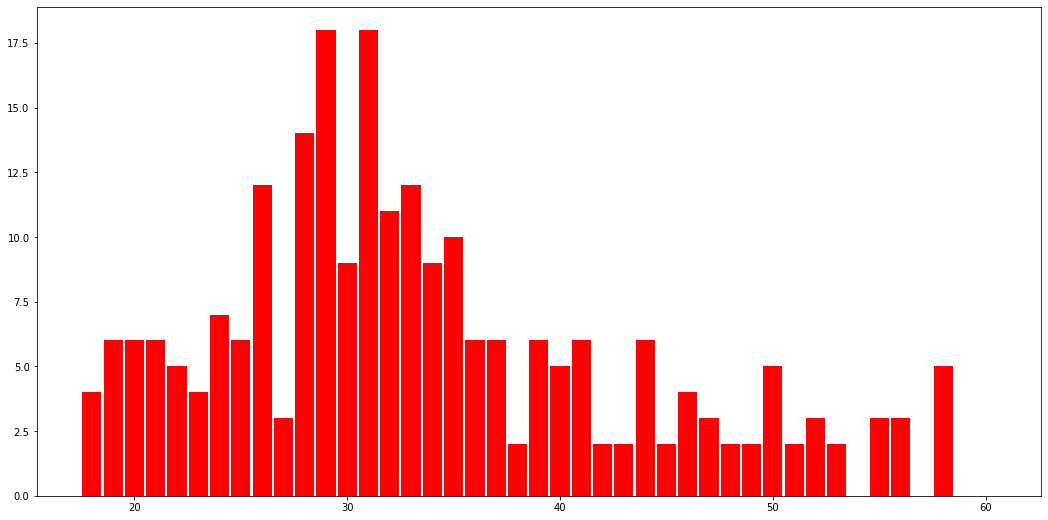

In [73]:
plt.figure(figsize=(18,9))
plt.bar(att1.Age,att1.Total_attrition,color='red',width=0.9)

In [74]:
#Re checking the database to decide on the next step


In [75]:
ibm.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_binary
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,1
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,0
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,1
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,0
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,0


In [89]:
ibm_le = ibm.get(Attrition_binary==1)

In [95]:
ibm_le = ibm.loc[ibm.Attrition_binary==1]   #THIS IS THE USE OF THE FUNCTION .loc AND ITS DIFFERENCE CAN BE CLEARLY SEEN WITH .iloc

In [117]:
ibm_le = ibm_le.sort_values(by = ['Age'])

In [96]:
#Now we will start analyzing the data based on the left employees

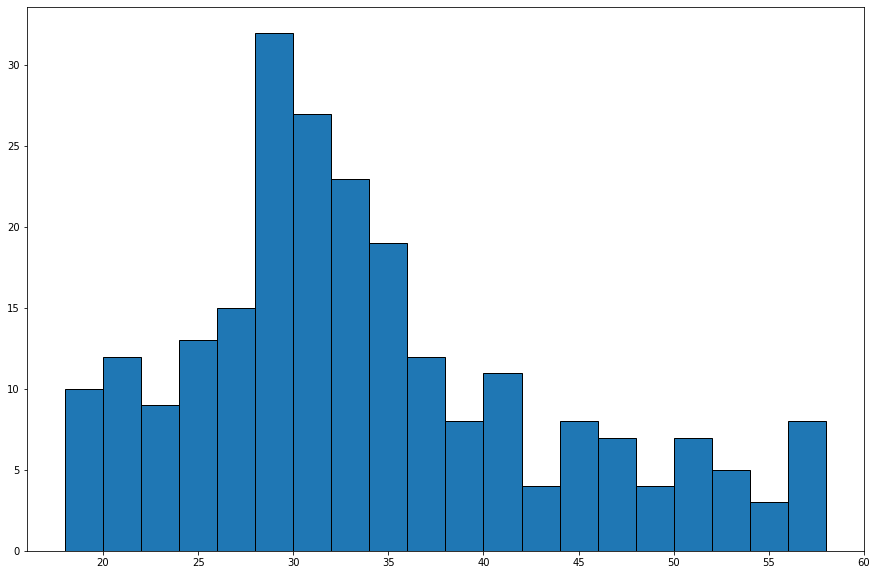

In [120]:
plt.figure(figsize=(15,10))
plt.hist(ibm_le.Age,bins=20,edgecolor='k')
plt.show()

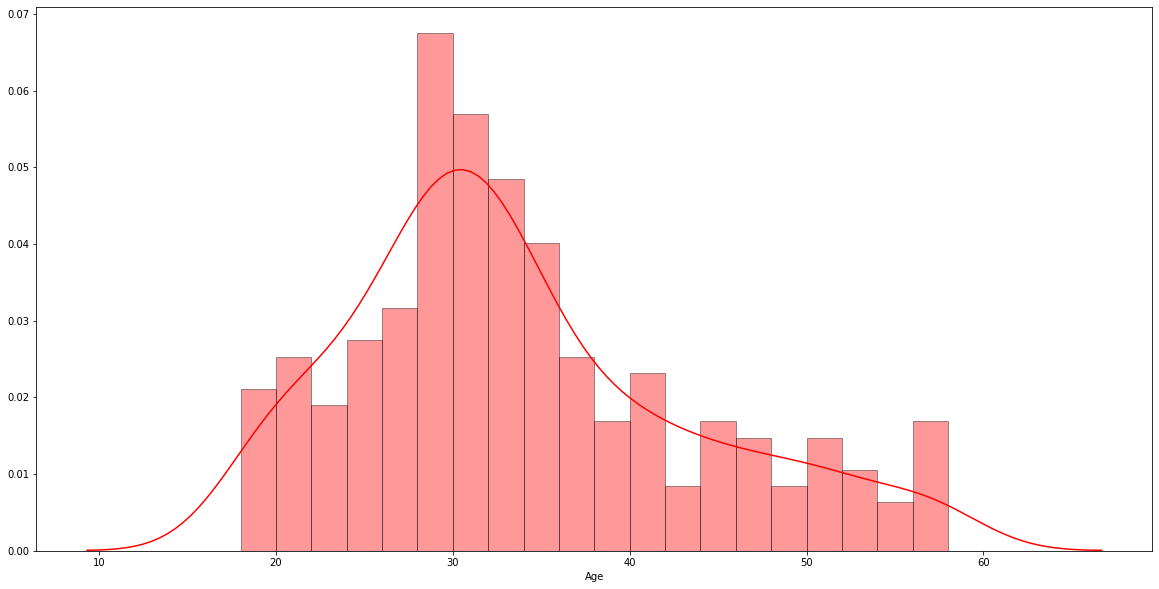

In [121]:
plt.figure(figsize=(20,10))
sns.distplot(ibm_le.Age,color='red',hist_kws={'edgecolor':'k'},bins=20)
plt.show()

In [126]:
age_std  = np.std(ibm_le.Age)
age_mean = np.mean(ibm_le.Age)
age_std,age_mean


(9.66888662035469, 33.607594936708864)

In [129]:
max_age=(age_mean+age_std)
min_age =(age_mean-age_std)
min_age,max_age

(23.938708316354173, 43.276481557063555)

### As we know from descriptive statistics 95% of the left employees age range (24,43)

In [130]:
##checking for normality

In [131]:
from scipy import stats

## Plotting QQ plot or probplot

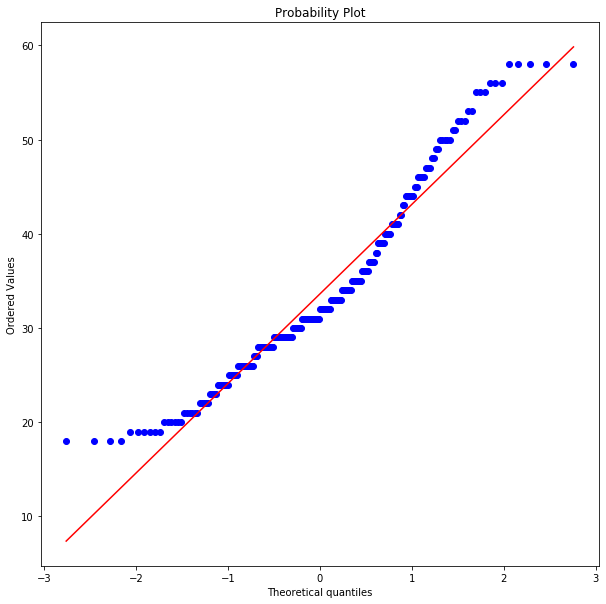

In [136]:
plt.figure(figsize=(10,10))
stats.probplot(ibm_le.Age,dist='norm',plot=plt)
plt.show()

### Checking which department they belong

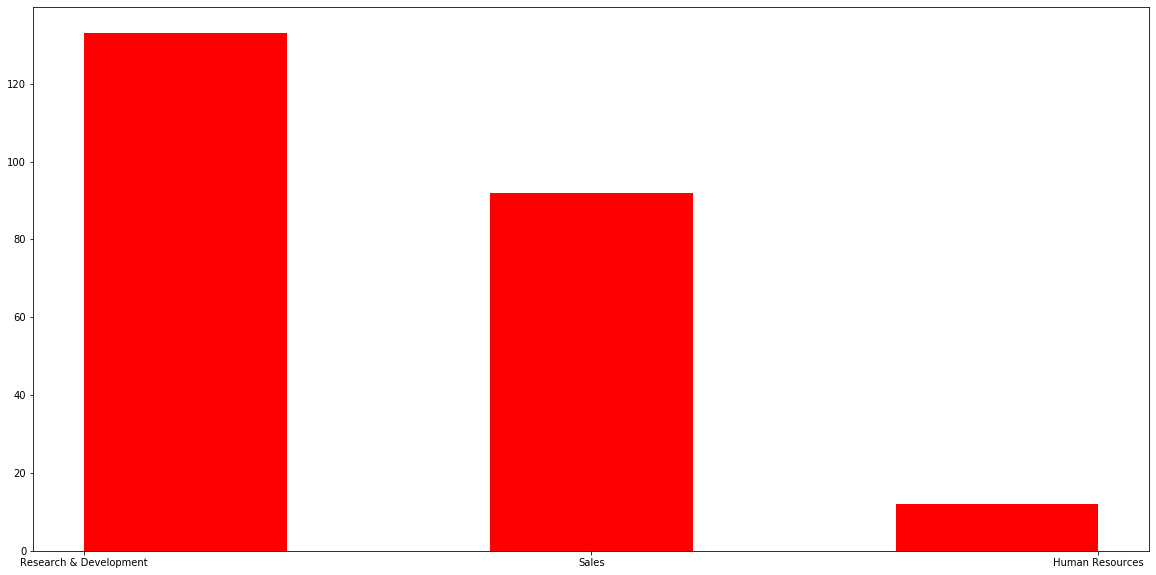

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

In [145]:
plt.figure(figsize=(20,10))
plt.hist(ibm_le.Department,color='red',bins=5)
plt.show()
ibm_le.Department.value_counts()

In [146]:
#Most people quit from the R&D 

In [147]:
ibm_le.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany', 'Attrition_binary'],
      dtype='object')

## Distrbution of employees by educational field

In [151]:
ibm.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

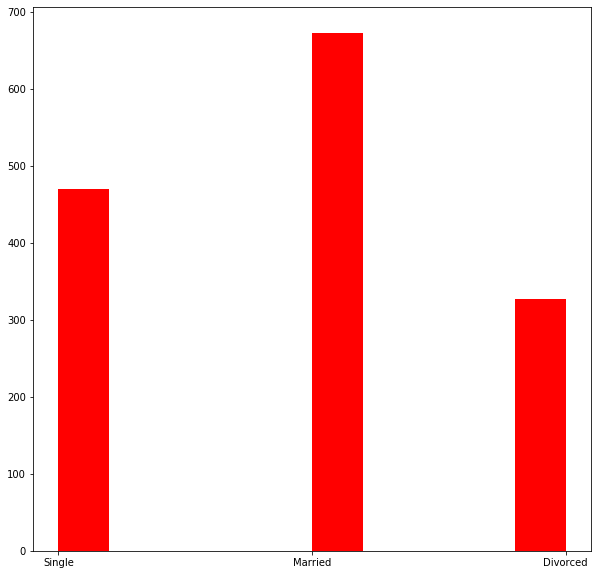

In [161]:
plt.figure(figsize=(10,10))
plt.hist(ibm.MaritalStatus,color='red',label=a)
plt.show()


In [165]:
#procceding with logarithmic model buillding

In [167]:
ibm = ibm.drop('Attrition',axis=1)

In [168]:
ibm.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_binary
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,1
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10,0
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0,1
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8,0
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2,0


In [185]:
ibm['Department'] = ibm['Department'].astype('category')
ibm['EducationField'] = ibm['EducationField'].astype('category')
ibm['MaritalStatus'] = ibm['MaritalStatus'].astype('category')
ibm['EnvironmentSatisfaction'] = ibm['EnvironmentSatisfaction'].astype('category')
ibm['WorkLifeBalance'] = ibm['WorkLifeBalance'].astype('category')
ibm['Attrition_binary'] = ibm['Attrition_binary'].astype('category')
ibm['JobSatisfaction'] = ibm['JobSatisfaction'].astype('category')

In [186]:
ibm.head(1)

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_binary
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6,1


In [192]:
ibm.dtypes

Age                           int64
Department                 category
DistanceFromHome              int64
Education                     int64
EducationField             category
EnvironmentSatisfaction    category
JobSatisfaction            category
MaritalStatus              category
MonthlyIncome                 int64
NumCompaniesWorked            int64
WorkLifeBalance            category
YearsAtCompany                int64
Attrition_binary           category
dtype: object

In [196]:
ibm.MaritalStatus.unique()

[Single, Married, Divorced]
Categories (3, object): [Single, Married, Divorced]

In [200]:
ibm_dummy_var = pd.get_dummies(ibm, columns=['Department','Education','EducationField','MaritalStatus','EnvironmentSatisfaction','WorkLifeBalance','JobSatisfaction']) #creating the dummy variables

In [202]:
ibm_dummy_var.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'YearsAtCompany', 'Attrition_binary', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'EnvironmentSatisfaction_1',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'WorkLifeBalance_1', 'WorkLifeBalance_2',
       'WorkLifeBalance_3', 'WorkLifeBalance_4', 'JobSatisfaction_1',
       'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4'],
      dtype='object')

In [212]:
logreg = LogisticRegression(max_iter=1000)

In [170]:
#splittin the data

In [205]:
ibm_train,ibm_test = train_test_split(ibm_dummy_var, train_size=0.70,random_state=2021)

In [206]:
ibm_test.shape,ibm_train.shape

((441, 35), (1029, 35))

In [207]:
X_train = ibm_train.drop('Attrition_binary',axis=1)
Y_train = ibm_train.Attrition_binary

In [208]:
Y_train.value_counts()

0    861
1    168
Name: Attrition_binary, dtype: int64

In [214]:
X_test = ibm_test.drop('Attrition_binary',axis=1)
Y_test = ibm_test.Attrition_binary

In [213]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
Y_pred = logreg.predict(X_test)

In [217]:
Y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [219]:
accurcy = accuracy_score(Y_test,Y_pred)

In [227]:
print('Accuracy percentage %f' % (accurcy*100))

Accuracy percentage 84.353741


In [230]:
roc_auc_score(Y_test,Y_pred)

0.5649251986909771

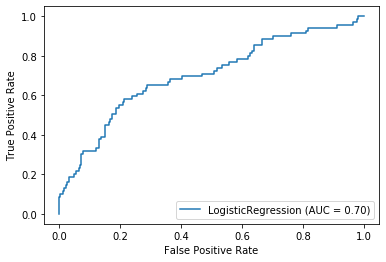

In [237]:
plot_roc_curve(logreg,X_test,Y_test)